In [1]:
import numpy as np
import matplotlib.pyplot as plt

import uxo_utils

from matplotlib import rcParams
rcParams["font.size"] = 14

In [2]:
ordnance = uxo_utils.load_ordnance_dict()
ordnance.keys()

dict_keys(['105mm', '2.36-in', '2.75-in', '2.95-in', '20-lb Bomb', '25-lb Bomb', '3-in', '3.5-in', '30mm', '37mm', '4-in', '4-in Sphere', '4.2-in', '4.5-in', '4.52-in', '5-lb Bomb', '57mm', '60mm', '66mm', '75mm', '76mm', '81mm', '90mm', '106mm', 'ISO Large', 'ISO Medium', 'ISO Small', '2.25-in', '10-lb Bomb', '100-lb Bomb', 'Booster', 'Fuze', '120mm', 'Grenade', '152mm', 'Igniter Bomb', 'Landmine', 'Livens Projectile', 'Depth Charge', 'Parachute Flare', 'Rifle Grenade', '155mm', 'Dual Mode HE Rocket', 'Smoke Pot', 'Underwater Mine', '16-in', '175mm', 'Rocket Motor', '20mm', '250-lb Bomb', '25mm', '35mm', '40mm', '105mm SABOT', '5-in', '50 cal', '6-in', '7.2-in Depth Charge', '8-in', 'Bomblet', 'Booster Cup'])

In [28]:
def plot_ordnance(
    key, ax=None, legend=True, xlabel=True, ylabel=True, 
    fontsize=None, show_entries=False, use_marker=False, plot_ratio=False
):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    times = ordnance[key]["times"]
    n_entries = len(ordnance[key]["L1"])
        
    for i in range(n_entries): 
        L1, L2, L3 = (ordnance[key][l][i] for l in ["L3", "L2", "L1"])
        
        if plot_ratio is False: 
            ax.loglog(times, L1, "C0", alpha=0.2, label="L1" if i==0 else None, marker="." if use_marker is True else None)
            ax.loglog(times, L2, "C1", alpha=0.2, label="L2" if i==0 else None, marker="." if use_marker is True else None)
            ax.loglog(times, L3, "C2", alpha=0.2, label="L3" if i==0 else None, marker="." if use_marker is True else None)
        elif plot_ratio is True: 
            ax.loglog(times, L1/L2, "C3", alpha=0.2, label="L1/L2" if i==0 else None, marker="." if use_marker is True else None)
            ax.loglog(times, L1/L3, "C9", alpha=0.2, label="L1/L3" if i==0 else None, marker="." if use_marker is True else None)
            ax.grid(alpha=0.5)
    
    title = f"{key}\n({n_entries} entries)" if show_entries else key
    ax.set_title(title, fontsize=fontsize)
    
    if xlabel is True: 
        ax.set_xlabel("time (ms)")
    
    if ylabel is True:
        ax.set_ylabel("polarizabilities")
        
    if legend is True: 
        ax.legend()

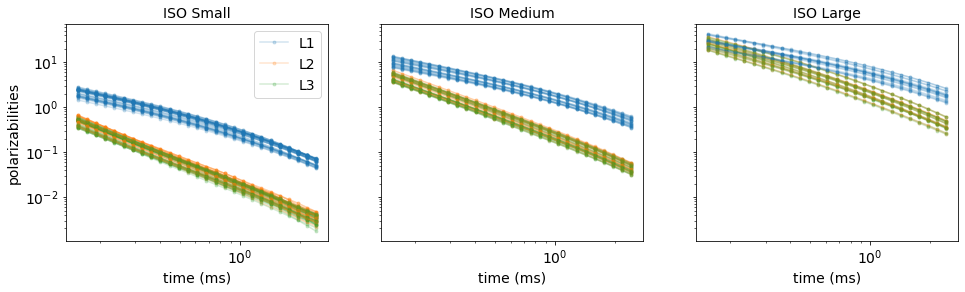

In [29]:
keys = ["ISO Small", "ISO Medium", "ISO Large"]
fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

for i, k in enumerate(keys):
    
    plot_ordnance(
        k, ax[i], 
        legend=True if i==0 else False,
        ylabel=True if i==0 else False,
        use_marker=True
    )
    

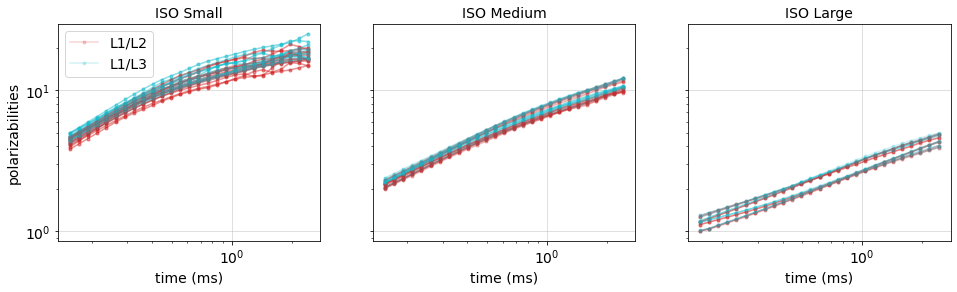

In [30]:
keys = ["ISO Small", "ISO Medium", "ISO Large"]
fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

for i, k in enumerate(keys):
    
    plot_ordnance(
        k, ax[i], 
        legend=True if i==0 else False,
        ylabel=True if i==0 else False,
        use_marker=True,
        plot_ratio=True
    )
    

In [31]:
n_ordnance = len(ordnance.keys())
ncol = 7
nrows = int(np.ceil(n_ordnance/ncol))

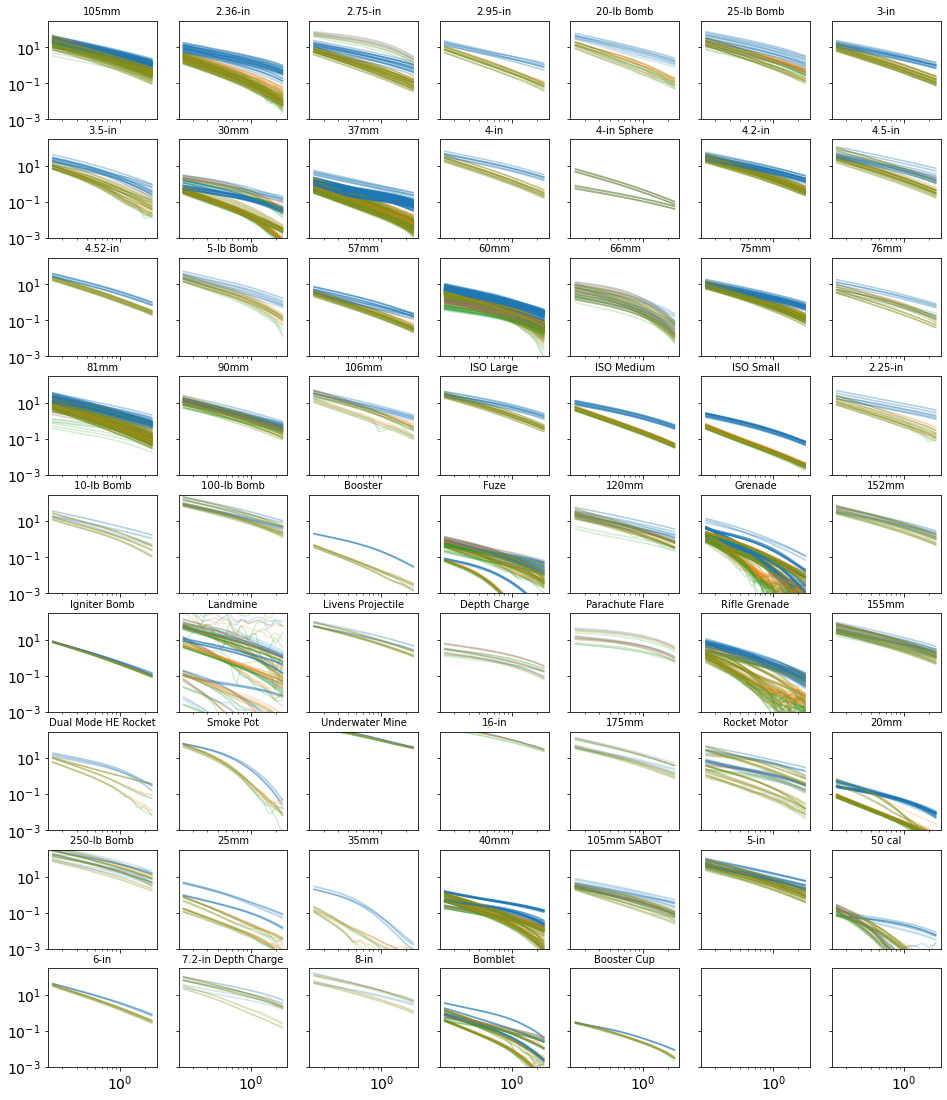

In [32]:
fig, ax = plt.subplots(nrows, ncol, figsize=(16, 2.75*ncol), sharex=True, sharey=True)
ax=ax.flatten()
ax[0].set_ylim([1e-3, 3e2])
for i, k in enumerate(ordnance.keys()): 
    plot_ordnance(
        k, ax[i], 
        legend=False,
        ylabel=False,
        xlabel=False, 
        fontsize=10,
    )
    
    